In [1]:
# Install required packages based on your python version
# Please install tkinter and numpy_financial and yahoo_finance (yfinance)

!!pip install tk
!!pip install numpy-financial
!!pip install yfinance

from tkinter import *
import tkinter as tk
import numpy_financial as npf
import pandas as pd

In [2]:
'''

master = Tk()
tk.Label(text="Hello, Tkinter")
e = Entry(master)
e.pack()

e.focus_set()

def callback():
    print(e.get()) # This is the text you may want to use later
    val = e.get()
    print("Values is :" + val)

b = Button(master, text = "OK", width = 10, command = callback)
b.pack()

mainloop()
'''

'\n\nmaster = Tk()\ntk.Label(text="Hello, Tkinter")\ne = Entry(master)\ne.pack()\n\ne.focus_set()\n\ndef callback():\n    print(e.get()) # This is the text you may want to use later\n    val = e.get()\n    print("Values is :" + val)\n\nb = Button(master, text = "OK", width = 10, command = callback)\nb.pack()\n\nmainloop()\n'

In [3]:
window_amount = tk.Tk()
#window_risk = tk.Tk()

'''
def risk_lvl(amount):
    label_risk = tk.Label(master=window_risk,text="Choose your risk level for investment")
    
    risk = IntVar()
    
    Radiobutton(window_risk, text = "High Risk", variable = risk , value = 1).pack()
    Radiobutton(window_risk, text = "Risk", variable = risk , value = 2).pack()
    Radiobutton(window_risk, text = "Low Risk", variable = risk , value = 1).pack()
    window_risk.mainloop()
'''

def amount_fun():
    #print(e.get()) # This is the text you may want to use later
    global amount
    amount = entry.get()
    print("Amount You want to invest :" + amount)
    window_amount.destroy()
    #risk_lvl(amount)
    

label = tk.Label(master=window_amount, text="Amount To Invest")
entry = tk.Entry(master=window_amount,)
amount_bt = Button(master=window_amount, text = "OK", width = 10, command = amount_fun)

label.pack()
entry.pack()
amount_bt.pack()

entry.focus_set()

window_amount.mainloop()


window_risk = tk.Tk()
risk = StringVar()


def risk_selection_fun():
    #print(e.get()) # This is the text you may want to use later
    global risk_val
    risk_val = risk.get()
    print("You Risk level is :" + risk_val)
    window_risk.destroy()

label_risk = tk.Label(window_risk, text="Choose your risk level for investment").pack()
Radiobutton(window_risk, text = "High Risk (80% for stocks and 20% for bonds)", variable = risk , value = 1).pack()
Radiobutton(window_risk, text = "Risk (70% for stocks and 30% for bonds)", variable = risk , value = 2).pack()
Radiobutton(window_risk, text = "Low Risk (60% for stocks and 40% for bonds)", variable = risk , value = 3).pack()

risk_bt = Button(master=window_risk, text = "OK", width = 10, command = risk_selection_fun).pack()

window_risk.mainloop()
#print("Final: " + amount)
#print("Risk: " + risk_val)
amount = int(amount)
risk_val = int(risk_val)

print(type(amount), type(risk_val))

stock_amount = 0
bond_amount = 0
if risk_val == 1:
    stock_amount = (80/100) * amount
    bond_amount = amount - stock_amount
elif risk_val == 2:
    stock_amount = (70/100) * amount
    bond_amount = amount - stock_amount
else:
    stock_amount = (60/100) * amount
    bond_amount = amount - stock_amount

print(str(stock_amount) + " Will goto Stocks")
print(str(bond_amount) + " Will goto Bonds")

Amount You want to invest :5000
You Risk level is :2
<class 'int'> <class 'int'>
3500.0 Will goto Stocks
1500.0 Will goto Bonds


#####  Bonds Calculation

In [4]:
# Currently We are using Top 3 Bonds in United Kingdom based on credit rating 

In [5]:
# Barclays Bank plc: coupon rate = 9% , Current value/Face value = 107.37  
# Co-operative Group Ltd : coupon rate = 11%, current value/Face value = 110.15
# EnQuest plc : coupon rate = 9%, current value/ Face value = 95.00

In [4]:
bonds_list = ['BARCLAYS', 'CO-OPERATIVE', 'ENQUEST']
bond_interest_rates = ['9', '11', '9']
bonds_current_val = ['107.37', '110.15', '95.00']
bond_vals = [(bond_amount / 3) for i in range(len(bonds_list))]
print(bond_vals)
no_of_bonds = [int(bond_vals[i]/float(bonds_current_val[i])) for i in range(len(bonds_current_val))]
print(no_of_bonds)
bonds = pd.DataFrame(list(zip(bonds_list, bond_interest_rates,bonds_current_val,no_of_bonds)), columns = ['Bonds',
                                                                                                         'Interest Rates',
                                                                                                         'Current Price',
                                                                                                         'Number of Bonds'])
print(bonds)

[500.0, 500.0, 500.0]
[4, 4, 5]
          Bonds Interest Rates Current Price  Number of Bonds
0      BARCLAYS              9        107.37                4
1  CO-OPERATIVE             11        110.15                4
2       ENQUEST              9         95.00                5


In [5]:
# Bond Price After 6 months
price_of_bonds = [ ((((float(bond_interest_rates[i])/100) * float(bonds_current_val[i])) * 0.5) ) * no_of_bonds[i] 
                  for i in range(len(no_of_bonds))]

print(price_of_bonds)
print("Fixed amount will be return in next 6 months:" + str(sum(price_of_bonds)))

[19.3266, 24.233, 21.374999999999996]
Fixed amount will be return in next 6 months:64.9346


##  Choose Stocks to Invest

In [6]:

window = tk.Tk()

frame1 = tk.Frame(master=window, height=200, width=500, bg="red")
frame1.pack(fill=tk.X)
def_stock_lbl = tk.Label(master=frame1, text="We prefer Below Stocks to Invest Your money").pack()
def_stock_list = tk.Label(master=frame1, text="AAPL, TSLA, MSFT, AMZN, TGT, VISA").pack()




def show_stock_list():
    #disp_label = Label(master=frame3, text=aapl_val.get()).pack()
    global stock_lst
    stock_lst = []
    stock_lst.append(aapl_val.get())
    stock_lst.append(tsla_val.get())
    stock_lst.append(msft_val.get())
    stock_lst.append(amzn_val.get())
    stock_lst.append(tgt_val.get())
    stock_lst.append(visa_val.get())
    #disp_label = Label(master=frame3, text=stock_lst).pack()
    #stock_lst = []
    window.destroy()

def select_default_stock():
    global stock_lst
    stock_lst = []
    stock_lst.append('AAPL')
    stock_lst.append('TSLA')
    stock_lst.append('MSFT')
    stock_lst.append('AMZN')
    stock_lst.append('TGT')
    stock_lst.append('V')
    window.destroy()
    
aapl_val = StringVar()
frame2 = tk.Frame(master=window, height=200, width=500, bg="yellow")
frame2.pack(fill=tk.X)
aapl_val = StringVar()
aapl_stock = Checkbutton(master=frame2, text = "AAPL", variable=aapl_val, onvalue="AAPL", offvalue="").pack()
tsla_val = StringVar()
tsla_stock = Checkbutton(master=frame2, text = "TSLA", variable=tsla_val, onvalue="TSLA", offvalue="").pack()
msft_val = StringVar()
msft_stock = Checkbutton(master=frame2, text = "MSFT", variable=msft_val, onvalue="MSFT", offvalue="").pack()
amzn_val = StringVar()
amzn_stock = Checkbutton(master=frame2, text = "AMZN", variable=amzn_val, onvalue="AMZN", offvalue="").pack()
tgt_val = StringVar()
tgt_stock = Checkbutton(master=frame2, text = "TGT", variable=tgt_val, onvalue="TGT", offvalue="").pack()
visa_val = StringVar()
visa_stock = Checkbutton(master=frame2, text = "VISA", variable=visa_val, onvalue="V", offvalue="").pack()

select_stock_bt = Button(master=frame2, text = "SELECT", width = 10, command = show_stock_list).pack()
select_preferred_stock_bt = Button(master=frame1, text = "Proceed", width = 10, command = select_default_stock).pack()

window.mainloop()

final_stock_lst = []
for i in stock_lst:
    if i.strip() != '':
        final_stock_lst.append(i)

print("Selected stock lists are:")
print(final_stock_lst)

Selected stock lists are:
['AAPL', 'TSLA', 'MSFT', 'AMZN', 'TGT', 'V']


In [7]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Mention start and end date
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,12,1)

In [9]:
# Download the stocks
stock_data = []
for i in range(len(final_stock_lst)):
    stock_data.append(web.DataReader(final_stock_lst[i], 'yahoo', start, end))

In [10]:
# Merge all stock data into single dataframe
#stocks = pd.concat([aapl['Close'],tsla['Close'],msft['Close'],amzn['Close'],tgt['Close'],visa['Close']], axis=1)

stocks = pd.concat([stock_data[i]['Close'] for i in range(len(stock_data))],  axis=1)
stocks.columns = final_stock_lst
stocks.head()

,AAPL,TSLA,MSFT,AMZN,TGT,V
Date,,,,,,
2014-12-31,27.594999,44.481998,46.450001,15.5175,75.910004,65.550003
2015-01-02,27.332500,43.862000,46.759998,15.4260,75.330002,66.254997
2015-01-05,26.562500,42.018002,46.330002,15.1095,73.980003,64.792503
2015-01-06,26.565001,42.256001,45.650002,14.7645,73.970001,64.375000
2015-01-07,26.937500,42.189999,46.230000,14.9210,76.769997,65.237503


<AxesSubplot:xlabel='Date'>

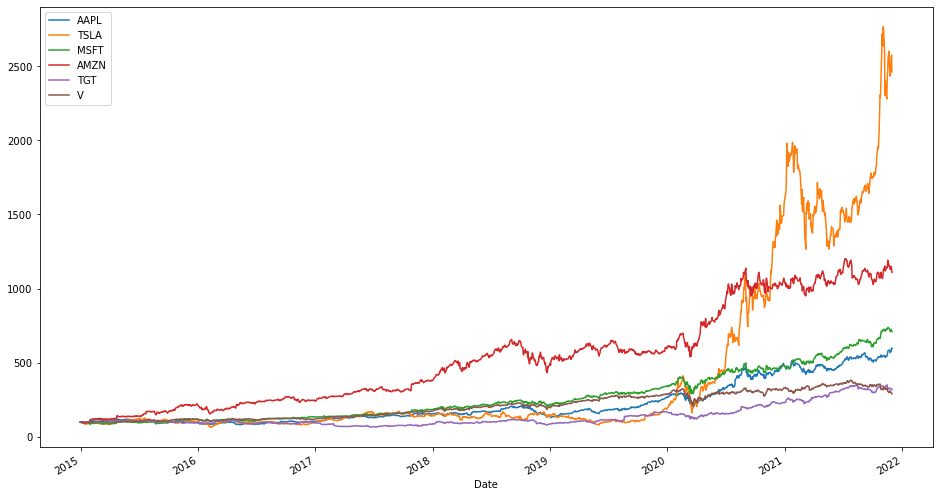

In [11]:
# Plot the growth over the total datasets
# The below line represents invest £100 on individual stock and it shows the growth over time period
(stocks / stocks.iloc[0] * 100).plot(figsize=(16, 9)) 

Text(0.5, 1.0, 'Annualized Returns of Assets')

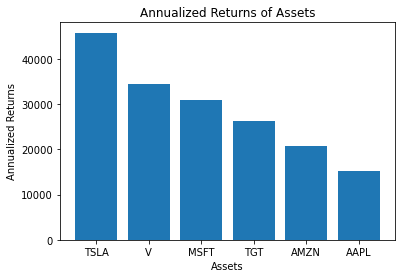

In [12]:
# Generate report for annualized return
Annulize_return = stocks.mean()*252
Annulize_return = Annulize_return.sort_values(ascending=False)

plt.bar(Annulize_return.index,Annulize_return)
plt.xlabel("Assets")
plt.ylabel("Annualized Returns")
plt.title("Annualized Returns of Assets")

In [13]:
# Log return 
log_ret = np.log(stocks/stocks.shift(1))
log_ret

,AAPL,TSLA,MSFT,AMZN,TGT,V
Date,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009558,-0.014036,0.006652,-0.005914,-0.007670,0.010698
2015-01-05,-0.028576,-0.042950,-0.009238,-0.020731,-0.018084,-0.022321
2015-01-06,0.000094,0.005648,-0.014786,-0.023098,-0.000135,-0.006465
2015-01-07,0.013925,-0.001563,0.012625,0.010544,0.037154,0.013309
...,...,...,...,...,...,...
2021-11-24,0.003278,0.006265,0.000681,0.000103,-0.001687,0.023698
2021-11-26,-0.032191,-0.031014,-0.024657,-0.021412,-0.008843,-0.027939
2021-11-29,0.021638,0.049647,0.020862,0.016137,0.010449,-0.006905


In [14]:
log_ret.corr()

,AAPL,TSLA,MSFT,AMZN,TGT,V
AAPL,1.000000,0.386818,0.682812,0.560859,0.307672,0.574722
TSLA,0.386818,1.000000,0.396674,0.355049,0.139801,0.348043
MSFT,0.682812,0.396674,1.000000,0.648452,0.328667,0.681770
AMZN,0.560859,0.355049,0.648452,1.000000,0.216301,0.483520
TGT,0.307672,0.139801,0.328667,0.216301,1.000000,0.304631
V,0.574722,0.348043,0.681770,0.483520,0.304631,1.000000


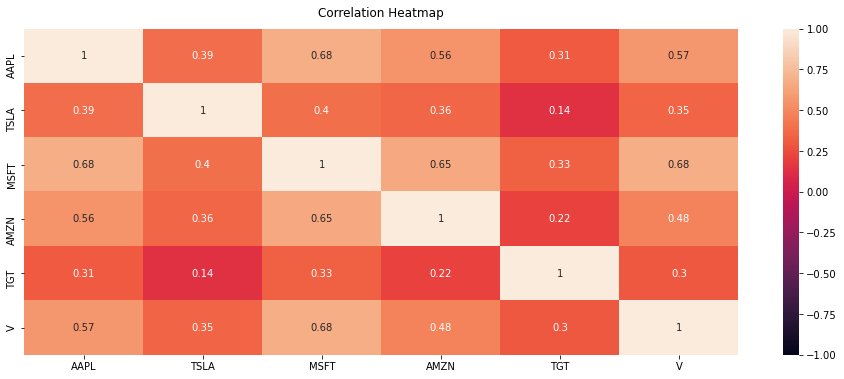

In [15]:
import seaborn as sns
plt.figure(figsize=(16, 6))
corr = log_ret.corr()
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
heatmap = sns.heatmap(log_ret.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [16]:
# MAXIMUM SHARPE RATIO
noOfportfolio = 10000
weight = np.zeros((noOfportfolio,len(final_stock_lst)))

expectedReturn = np.zeros(noOfportfolio)
expectedVolatility = np.zeros(noOfportfolio)
sharpeRatio = np.zeros(noOfportfolio)

meanLogRet = log_ret.mean()
sigma = log_ret.cov()
for k in range(noOfportfolio):
    # generate random weight return
    w = np.array(np.random.random(len(final_stock_lst)))
    w = w / np.sum(w)
    weight[k,:] = w
    # Expected log return
    expectedReturn[k] = np.sum(meanLogRet * w)
    # Expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    # Sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]

In [17]:
maxIndex = sharpeRatio.argmax()
print(maxIndex)
print(weight[maxIndex,:])

8791
[0.14258949 0.13361638 0.13340226 0.46513076 0.12114314 0.00411796]


In [18]:
print(sum(weight[maxIndex,:]))

1.0000000000000002


In [19]:
for i in range(len(final_stock_lst)):
    percentage_of_stock = (weight[maxIndex,i] * 100) 
    amount_to_be_invest = (percentage_of_stock/100) * stock_amount
    print(final_stock_lst[i] + ":" + str(amount_to_be_invest))

AAPL:499.06320415494275
TSLA:467.6573250980914
MSFT:466.9079260124871
AMZN:1627.9576774697864
TGT:424.0010001658175
V:14.41286709887508


In [20]:
stock_amount

3500.0

In [21]:
noOfportfolio = 10000
weight = np.zeros((noOfportfolio,len(final_stock_lst)))

expectedReturn = np.zeros(noOfportfolio)
expectedVolatility = np.zeros(noOfportfolio)
sharpeRatio = np.zeros(noOfportfolio)

meanLogRet = log_ret.mean()
sigma = log_ret.cov() * 252
for k in range(noOfportfolio):
    # generate random weight return
    w = np.array(np.random.random(len(final_stock_lst)))
    w = w / np.sum(w)
    weight[k,:] = w
    # Expected log return
    expectedReturn[k] = np.sum(meanLogRet * w * 252)
    # Expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    # Sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]
    
simulations_data = [expectedReturn, expectedVolatility, sharpeRatio, weight]

# Create a DataFrame from it, then Transpose it so it looks like our original one.
simulations_df = pd.DataFrame(data=simulations_data).T

# Give the columns the Proper Names.
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]

# Make sure the data types are correct, we don't want our floats to be strings.
simulations_df = simulations_df.infer_objects()

# Print out the results.
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)


SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0  0.352021    0.294388      1.195772   
1  0.286669    0.258345      1.109639   
2  0.291314    0.238199      1.222988   
3  0.287684    0.233138      1.233964   
4  0.301274    0.239792      1.256397   

                                   Portfolio Weights  
0  [0.18525513859356427, 0.33563817565622744, 0.1...  
1  [0.13387425476321063, 0.2779736738305178, 0.04...  
2  [0.017530764330535263, 0.14929740708400427, 0....  
3  [0.27687348805499934, 0.11089921800808329, 0.1...  
4  [0.1753648929720223, 0.1655435532442894, 0.114...  
--------------------------------------------------------------------------------


In [22]:
# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# Return the Min Volatility from the run.
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio['Portfolio Weights'])
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility['Portfolio Weights'])
print('-'*80)


MAX SHARPE RATIO:
--------------------------------------------------------------------------------
[0.01477367 0.13364972 0.32938965 0.385811   0.12386668 0.01250928]
--------------------------------------------------------------------------------

MIN VOLATILITY:
--------------------------------------------------------------------------------
[0.14570657 0.00515103 0.0550371  0.17719729 0.29938982 0.31751819]
--------------------------------------------------------------------------------


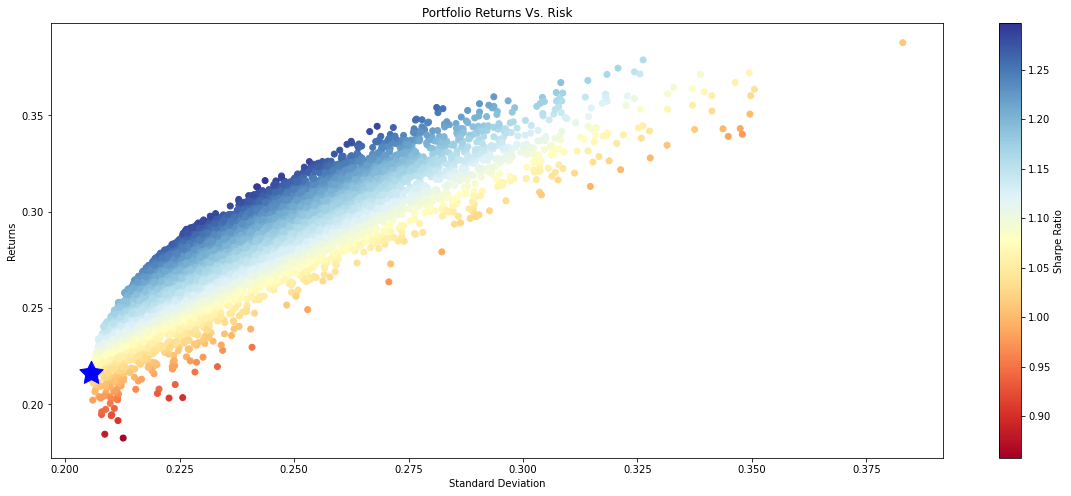

In [23]:
# Plot the data on a Scatter plot.
plt.figure(figsize=(20,8))
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the Plot some labels, and titles.
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Finally, show the plot.
plt.show()

In [24]:
print("Minimum Sharpe ratio: {}".format(sharpeRatio.min()))
print("Its location of the array: {}".format(sharpeRatio.argmin()))

Minimum Sharpe ratio: 0.8578657394005322
Its location of the array: 4988


In [25]:
print("Maximum Sharpe ratio of Monte Carlo Model: {}".format(sharpeRatio.max()))
#print("Its location of the array: {}".format(sharpeRatio.argmax()))

Maximum Sharpe ratio of Monte Carlo Model: 1.2971806931638756


In [26]:
maxSharpe_ratio_index = sharpeRatio.argmax()
print(weight[maxSharpe_ratio_index,:])

[0.01477367 0.13364972 0.32938965 0.385811   0.12386668 0.01250928]


In [27]:
for i in range(len(final_stock_lst)):
    percentage_of_stock = (weight[maxSharpe_ratio_index,i] * 100) 
    amount_to_be_invest = (percentage_of_stock/100) * stock_amount
    print(final_stock_lst[i] + ":" + str(amount_to_be_invest))

AAPL:51.70785860848072
TSLA:467.7740064106209
MSFT:1152.8637778964533
AMZN:1350.3384846068668
TGT:433.53338771239504
V:43.78248476518367


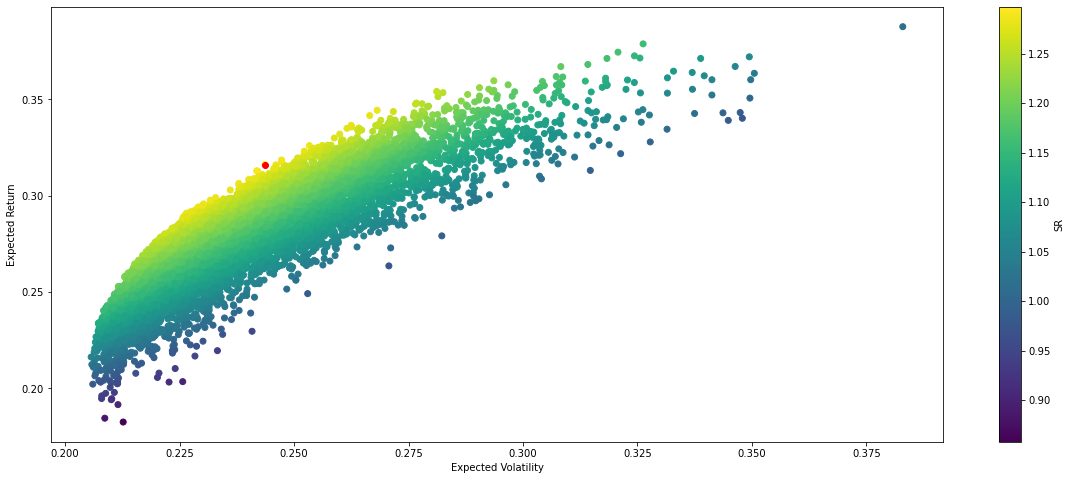

In [28]:
max_sr_ret = expectedReturn[sharpeRatio.argmax()]
max_sr_vol = expectedVolatility[sharpeRatio.argmax()]
plt.figure(figsize=(20,8))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='SR')
plt.scatter(max_sr_vol,max_sr_ret, c='Red')
plt.show()

In [29]:
#Apply Minimize function

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [30]:
# Need to sort out initial guess
cons = ({'type':'eq', 'fun':check_sum})
ex = [(0,1) for i in range(len(final_stock_lst)) ]
#print(ex)
bounds = tuple(ex)
#bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess = [1/len(final_stock_lst) for i in range(len(final_stock_lst))]
#init_guess = [0.167,0.167,0.167,0.167,0.167,0.167]

In [31]:
from scipy.optimize import minimize

opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -1.3073106021152863
     jac: array([ 2.32696533e-04, -7.17639923e-05,  6.33448362e-05, -1.25169754e-06,
       -3.69250774e-05,  2.02352881e-01])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.59984441e-02, 1.40483409e-01, 2.07823677e-01, 4.66836440e-01,
       1.68858029e-01, 5.83300769e-17])


In [32]:
print(opt_results.x[2]* stock_amount)

727.382869813022


In [33]:
for i in range(len(final_stock_lst)):
    #percentage_of_stock = (opt_results.x[i] * 100) 
    amount_to_be_invest = (opt_results.x[i]) * stock_amount
    print(final_stock_lst[i] + ":" + str(amount_to_be_invest))

AAPL:55.99455417832166
TSLA:491.69193162793437
MSFT:727.382869813022
AMZN:1633.9275412327024
TGT:591.0031031480192
V:2.0415526907902048e-13


In [34]:
frontier_y = np.linspace(0.16,0.380,200)
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [35]:
val = get_ret_vol_sr(opt_results.x)
print("Sharpe Ratio of Markowitz's after appying minimization functio:",val[2])

Sharpe Ratio of Markowitz's after appying minimization functio: 1.3073106021152863


In [36]:
# Draw Efficient frontier 

frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

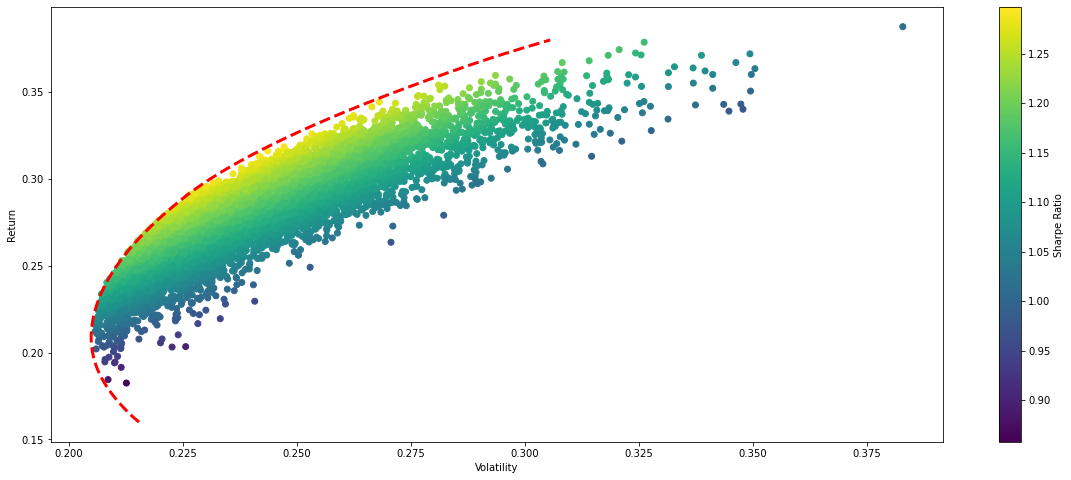

In [37]:
plt.figure(figsize=(20,8))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()

In [38]:
##### Measuring Performance By using Sharpe ratio and Information ratio and other measures ########

In [39]:
Annulize_return

TSLA    45731.820676
V       34408.779057
MSFT    30854.252525
TGT     26137.283901
AMZN    20618.421292
AAPL    15124.223849
dtype: float64

In [40]:
weights_minimization = {'AAPL':1.59984441e-02, 'TSLA':1.40483409e-01, 'MSFT':2.07823677e-01, 'AMZN':4.66836440e-01 , 'TGT':1.68858029e-01,
       'V':5.83300769e-17}


In [41]:
total_return = ([weights_minimization.get(x) for x in log_ret.columns] * log_ret).sum(axis=1)
total_return.describe()

count    1743.000000
mean        0.001265
std         0.015361
min        -0.102519
25%        -0.005885
50%         0.001687
75%         0.008888
max         0.083911
dtype: float64

In [42]:
total_return = pd.DataFrame(total_return)
total_return.rename(columns={total_return.columns[0]: "Portfolio"}, inplace=True)

In [43]:
# Download ETF data
import yfinance as yf

etf = yf.download("SPY ARKK XLE XLF GLD QQQ", start=start, end=end)

[*********************100%***********************]  6 of 6 completed


In [44]:
etf_returns = etf['Adj Close'].pct_change()[1:]

In [45]:
merge_etf_total_return = pd.merge(etf_returns, total_return,'inner', on='Date')

In [46]:
from scipy import stats

linear_reg_measure = merge_etf_total_return.apply(lambda x: stats.linregress(merge_etf_total_return['SPY'], x), 
                                                result_type='expand').rename(index={0: 'slope', 1: 
                                                                                  'intercept', 2: 'rvalue', 3:
                                                                                  'p-value', 4:'stderr'})
linear_reg_measure

,ARKK,GLD,QQQ,SPY,XLE,XLF,Portfolio
slope,1.231057e+00,-0.003645,1.089952,1.0,1.247108e+00,1.150530,1.043211e+00
intercept,4.632807e-04,0.000257,0.000243,0.0,-5.965616e-04,-0.000130,6.581235e-04
rvalue,7.039960e-01,-0.004613,0.920698,1.0,7.060668e-01,0.864858,7.563166e-01
p-value,9.752453e-261,0.847479,0.000000,0.0,6.242403e-263,0.000000,7.905050e-323
stderr,2.978114e-02,0.018948,0.011079,0.0,2.999374e-02,0.016015,2.163879e-02


In [47]:
# This calculates the predicted value for each observed value
observation_arkk = merge_etf_total_return['ARKK']
prediction_arkk = linear_reg_measure['ARKK'].slope * merge_etf_total_return['SPY'] + linear_reg_measure['ARKK'].intercept

# This prints the residual for each pair of observations
error_arkk = observation_arkk - prediction_arkk
standardized_error = np.std(error_arkk)

In [48]:
linear_reg_measure['ARKK'].intercept / standardized_error

0.033501709460810804

In [49]:
# This calculates the predicted value for each observed value
final_observation = merge_etf_total_return['Portfolio']
final_prediction = linear_reg_measure['Portfolio'].slope * merge_etf_total_return['SPY'] + linear_reg_measure['Portfolio'].intercept

# This prints the residual for each pair of observations
final_error = final_observation - final_prediction
final_std_error = np.std(final_error)

linear_reg_measure['Portfolio'].intercept / final_std_error

0.06549957839684127